False


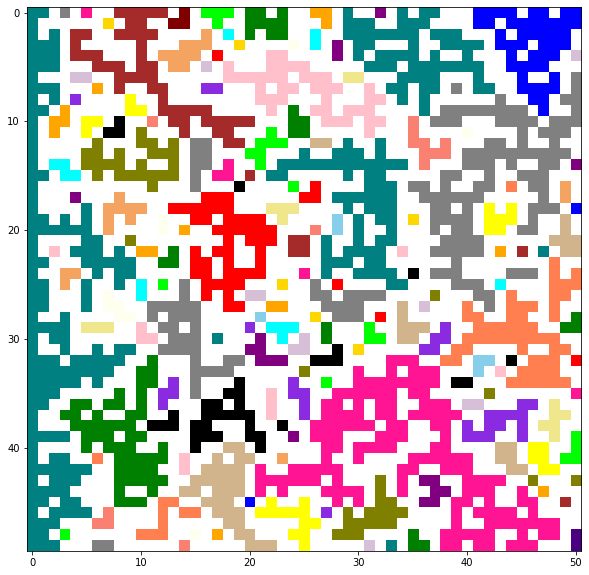

In [20]:
import numpy as np
import pylab as plb
import matplotlib
plb.rcParams['figure.figsize'] = 10,10
L = 50
p = .51
net = np.random.rand(L,L)
net[net > p] = 0
net[net != 0] = 1
net = net.astype('int8')

PathMatrix = np.zeros((L,L+1),int)
PathMatrix[:,0] = 1
counter = 2

for j in range(L):
    for i in range(L):
        
        left = PathMatrix[i][j]
        up = PathMatrix[i-1][j+1]
        Min = min([left,up])
        Max = max([left,up])
        
        if j==0 and net[i][j]:
            PathMatrix[i,j+1] = 1
        
        elif j!=0 and net[i][j]:
            if i==0 and left == 0:
                PathMatrix[i,j+1] = counter
                counter+=1  
            if Max == 0:
                PathMatrix[i,j+1] = counter
                counter+=1
            if Min > 0 and up != left:
                PathMatrix[i,j+1] = Min
                PathMatrix[PathMatrix == Max] = Min
            if Min == 0 and Max:
                PathMatrix[i,j+1] = Max
            if up == left and Min:
                PathMatrix[i,j+1] = Min
Validator = False              
for i in range(L):
    if PathMatrix[i][-1] == 1:
        Validator = True

cmap = matplotlib.colors.ListedColormap(['white',"black",'skyblue','tan','thistle','teal','sandybrown','red','coral','blueviolet','khaki','ivory','deeppink','salmon','tomato','purple','orange','green','yellow','grey','blue','cyan','lime','olive','gold','maroon','pink','brown','indigo']*60)
print(Validator)
plb.imshow(PathMatrix,cmap=cmap)
